## Load nessary libraries and DataSet

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

#### In the first part of k-means clustering, we want to analyze a *randomly generated dataset*

For this we use `make_blobs` class of `sklearn.datasets` package.
We generate **5000** samples with the given **four centers**.
But first, we need to set a random seed to zero as below.

In [4]:
np.random.seed(0)

# generate random samples
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2,-1], [2,-3], [1,1]], cluster_std=0.9)
print (X)
print (y)

[[-1.82150565  0.07098024]
 [ 2.16732621 -2.93199608]
 [ 0.8465158  -3.26075305]
 ...
 [ 3.29772603  4.24400152]
 [-1.69503125 -0.29979681]
 [-1.64362141  0.63035513]]
[1 2 2 ... 0 1 1]


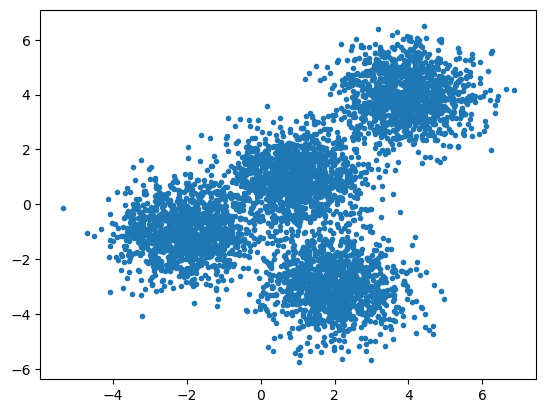

In [5]:
# plot the generated data
plt.scatter(X[:,0], X[:,1], marker='.')

### Setting up K-means

parameters:
* **init**: Initialization method of the centroids. 
Value will be: "k-means++
* **n_clusters**: The number of clusters to form as well as the number of centroids to generate. 
Value will be: 4 (since we have 4 centers
* **n_init**: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of *n_init* consecutive runs in terms of inertia. 
Value will be: 12)"

In [11]:
k_means = KMeans(init="k-means++", n_clusters=4, n_init=12)
k_means.fit(X)
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0])

In [13]:
# specify and save the clusters' cordinations 
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

### Plot the clusters

Now we want to plot all samples buth, *this time we are going to consider
their clusters and out k-means output*


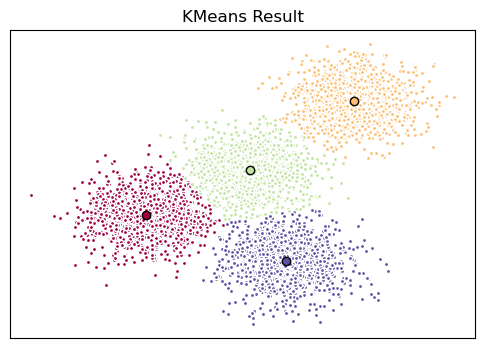

In [28]:
fig = plt.figure(figsize=(6, 4))

# Colors is a color map based on the number of clusters
# We use colormaps from matplotlib package, we need 4 colors based on
# the number of clusters' distinct labels
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))
ax = fig.add_subplot(1, 1, 1)

# k will range 0-3
# colors are 4 different types
# Differentiate samples belonging to each cluster, then plot with a unique color
# Each centroid will be plotted individually
for k, col in zip(range(len(set(k_means_labels))), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # for Centroids
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title('KMeans Result')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

plt.show()    